# Homework 4 #
## Due March 13, 11:59pm ##
#### Submit all work including computer codes ####

### Question 1 (20 points)  ###
$$ \begin{align*}
    \mathbf{p}_k &= \nabla f_k + \beta \mathbf{p}_{k-1} \\
    \mathbf{x}_{k+1} &= \mathbf{x}_k - \alpha_k \mathbf{p}_k
\end{align*} $$
                          
Program the heavy ball method with your best choice of $(\alpha,\beta)$, guided by theory in the class notes,  to minimize the Rosenbrock function: 

$$ \begin{align*}
    f(x) = 100(x_{2} − x_{1}^{2})^{2} + (1 − x_{1})^{2} \\
\end{align*} $$ 

Choose initial point $(1.2, 1.2)$, set tolerance $1e^{-8}$ (adjust if necessary) on the norm of gradient, and plot the norm of gradient (on log scale) vs. iteration numbers.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

After 123 iterations, approximate minimum is 2.3063396547071404 at [-0.51866377  0.26901211]


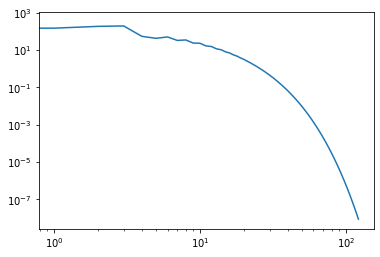

In [2]:
f = lambda x,y: 100*(y-x**2)**2 + (1-x)**2
df = lambda x,y: np.array([((-400)*(y-x**2)*x + (-2)*(y-x**2)),(200*(y-x**2))])
Q = np.array([[62,0],[0,400]])

x = np.array([1.2,1.2])
beta = 0.945
tol = 1e-8
max_steps = 10000
norms = []
dx = df(x[0],x[1])
pk = 0
i=0
while np.linalg.norm(dx)>tol and i<max_steps:
    alpha = (dx@dx)/(dx@(Q@dx))   # optimal step size
    xnew = x - alpha*dx
    pk = dx + beta*pk
    x = xnew
    i += 1
    dx = df(x[0],x[1])
    norms.append(np.linalg.norm(dx))
print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')
plt.plot(norms)
plt.yscale("log")
plt.xscale('log')

### Question 2 (12 points)  ###
The file CaCovidInfMarch24toMidJuly.txt on class website contains daily new cases of Covid-19 in CA from March 24 to mid July 2020, for a period of 120 days.  Use the first 90 days for training a linear regression model $(I = A + Bt)$ to predict the infected cases the next 30 days. You may use Scikit-Learn functions.
    
a) Compute optimal solution by solving normal equation;

b) Compute optimal solution by full batch gradient descent;

c) Compute optimal solution by mini-batch (size 10) stochastic gradient descent;

d) Compute training and prediction mean square errors for solutions from (a), (b) and (c), and plot model outputs (in red for the first 90 days, in green for the remaining 30 days) along with data (in blue). 

In [3]:
hw_data = np.loadtxt('CaCovidInfMarch24toMidJuly.txt')

In [4]:
# Part a
t = np.arange(1,len(hw_data)+1)
xtrain = t[0:90]
ytrain = hw_data[0:90]

A2 = np.c_[np.ones((90,1)),xtrain] # of days set up for linear regression
x_2a = np.linalg.inv(A2.T.dot(A2)).dot(A2.T).dot(ytrain)
print('Normal equation: y = {} + {}x'.format(optimal_x[0],optimal_x[1]))

Normal equation: y = 613.3124432734078 + 30.17059660937564x


In [6]:
# Part b
def full_batch_gradient_descent(x_b, y, n, theta= np.array([[-700],[70]]) , eta= 0.000004):                           
    theta_bgd = []
    for iteration in range(n):
        gradients = x_b.T.dot(x_b.dot(theta) - y)
        theta = theta - eta * gradients
        theta_bgd.append(theta)
    return theta_bgd
data = np.reshape(ytrain, (len(hw_data[0:90]),1))
x_2b = full_batch_gradient_descent(A2,data,10000)
print('Full batch gradient descent: y = {} + {}x'.format(x_2b[-1][0][0],x_2b[-1][1][0]))

Full batch gradient descent: y = 71.10062032814251 + 39.1583376197504x


In [8]:
# Part c
def minibatch_gradient_descent(x_b, y, n, minibatch_size, theta= np.array([[-700],[70]]), t0=200, t1=5000000):
    theta_path_mgd = []
    np.random.seed(42)
    m = len(x_b)
    def learning_schedule(t): # Learning rate
        return t0 / (t + t1)
    t = 0
    for epoch in range(n):
        shuffled_indices = np.random.permutation(m)
        x_b_shuffled = x_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
            t += 1
            xi = x_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients
            theta_path_mgd.append(theta)
    return theta_path_mgd
data = np.reshape(ytrain, (len(hw_data[0:90]),1))
x_2c = minibatch_gradient_descent(A2, data, 20000, 10)
print('Mini batch (size 10) gradient descent: y = {} + {}x'.format(x_2c[-1][0][0],x_2c[-1][1][0]))

Mini batch (size 10) gradient descent: y = 571.7306016976861 + 30.294000488600613x


The mean squared error in part A for ytrain is:  174636.09534284784
The mean squared error in part A for y_valid is:  18174062.416765206


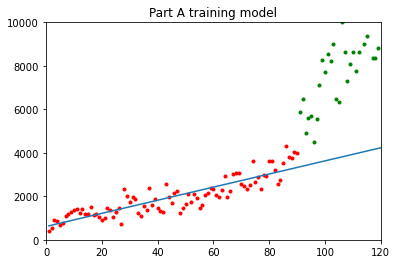

In [22]:
# Part d

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Graph of a
x_2a = np.linalg.inv(A2.T.dot(A2)).dot(A2.T).dot(ytrain)
x_other = t[90:120]
y_other = hw_data[90:120]
ytrain_predict2a = x_2a[0] + x_2a[1]*xtrain
y_predict2a = x_2a[0] + x_2a[1]*x_other

print('The mean squared error in part A for ytrain is: ', mean_squared_error(ytrain, ytrain_predict2a))
print('The mean squared error in part A for y_valid is: ', mean_squared_error(y_other, y_predict2a))

plt.plot(xtrain, ytrain, "r.")
plt.plot(x_other, y_other, 'g.')
plt.plot(t, x_2a[0] + x_2a[1]*t)
plt.title('Part A training model')
plt.axis([0,120,0,10000])
plt.show()

The mean squared error in part B for y_train is:  246916.30657856498
The mean squared error in part B for y_valid is:  14929244.644954579


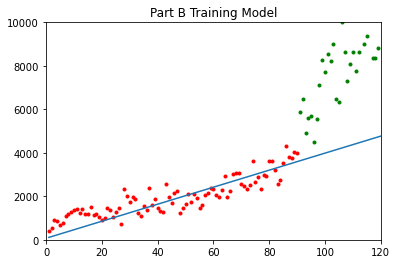

In [31]:
# Graph of b
x_2b = full_batch_gradient_descent(A2,data,10000)
ytrain_predict2b = x_2b[-1][0][0] + x_2b[-1][1][0]*xtrain
y_predict2b = x_2b[-1][0][0] + x_2b[-1][1][0]*x_other

print('The mean squared error in part B for y_train is: ', mean_squared_error(ytrain, ytrain_predict2b))
print('The mean squared error in part B for y_valid is: ', mean_squared_error(y_other, y_predict2b))

plt.plot(xtrain, ytrain, "r.")
plt.plot(x_other, y_other, 'g.')
plt.plot(t, x_2b[-1][0][0] + x_2b[-1][1][0]*t)
plt.title('Part B Training Model')
plt.axis([0,120,0,10000])
plt.show()

The mean squared error in part C for y_train is:  175939.9958994725
The mean squared error in part C for y_valid is:  18402280.35599857


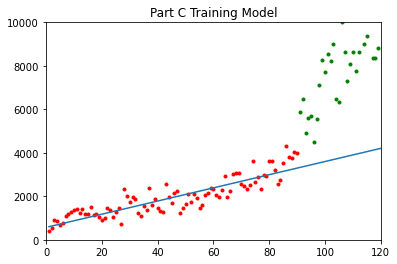

In [45]:
# Graph of c
x_2c = minibatch_gradient_descent(A2, data, 20000, 10)
ytrain_predict2c = x_2c[-1][0][0] + x_2c[-1][1][0]*xtrain
y_predict2c = x_2c[-1][0][0] + x_2c[-1][1][0]*x_other

print('The mean squared error in part C for y_train is: ', mean_squared_error(ytrain, ytrain_predict2c))
print('The mean squared error in part C for y_valid is: ', mean_squared_error(y_other, y_predict2c))

plt.plot(xtrain, ytrain, "r.")
plt.plot(x_other, y_other, 'g.')
plt.plot(t, x_2c[-1][0][0] + x_2c[-1][1][0]*t)
plt.title('Part C Training Model')
plt.axis([0,120,0,10000])
plt.show()

### Question 3 (12 points)  ###
Repeat Problem 2 for quadratic polynomial regression model $(I = A + Bt + Ct^{2})$.

In [23]:
# Part a
A3 = np.c_[np.ones((90,1)),xtrain,xtrain**2]
x_3a = np.linalg.inv(A3.T.dot(A3)).dot(A3.T).dot(hw_data[0:90])
print('Normal equation: y = {} + {}x'.format(x_3a[0],x_3a[1]))

Normal equation: y = 1001.093764883924 + 4.880510417386798x


In [11]:
# Part b
x_3b = full_batch_gradient_descent(A3,data,10000,  theta = np.array([[1000],[5],[0]]), eta = 1e-9)
print('Full batch gradient descent: y = {} + {}x + {}x^2'.format(x_3b[-1][0][0],x_3b[-1][1][0], x_3b[-1][2][0]))

Full batch gradient descent: y = 999.9996869035034 + 4.993095923166919x + 0.2765805662285502x^2


In [13]:
# Part c
x_3c = minibatch_gradient_descent(A3,data,10000,10, theta = np.array([[1000],[5],[0]]), t0=2000, t1=50000000000)
print('Mini-batch (size 10) gradient descent: y = {} + {}x + {}x^2'.format(x_3c[-1][0][0],x_3c[-1][1][0], x_3c[-1][2][0]))

Mini-batch (size 10) gradient descent: y = 999.9977077896175 + 4.8961011567906985x + 0.29989565386107186x^2


The mean squared error in part A for the training y values is:  146501.07537748016
The mean squared error in part A for the other y values is:  11693779.459501602


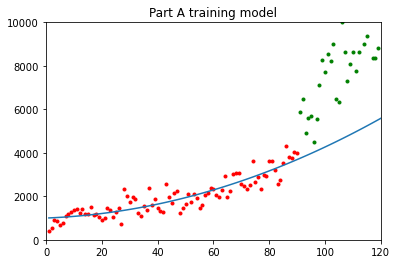

In [25]:
# Part d

# Graph of a
A3 = np.c_[np.ones((90,1)),xtrain,xtrain**2]
x_3a = np.linalg.inv(A3.T.dot(A3)).dot(A3.T).dot(hw_data[0:90])
ytrain_predict3 = x_3a[0] + x_3a[1]*xtrain + x_3a[2]*xtrain**2
y_predict3 = x_3a[0] + x_3a[1]*x_other + x_3a[2]*x_other**2

print('The mean squared error in part A for the training y values is: ', mean_squared_error(ytrain, ytrain_predict3))
print('The mean squared error in part A for the other y values is: ', mean_squared_error(y_other, y_predict3))

plt.plot(xtrain, ytrain, "r.")
plt.plot(x_other, y_other, 'g.')
plt.plot(t, x_3a[0] + x_3a[1]*t + x_3a[2]*t**2)
plt.title('Part A training model')
plt.axis([0,120,0,10000])
plt.show()

The mean squared error in part B for y_train is:  146501.91028941132
The mean squared error in part B for y_valid is:  11722191.168527246


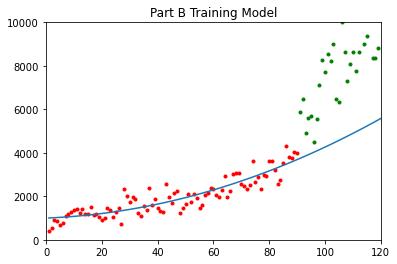

In [33]:
# Graph of b
x_3b = full_batch_gradient_descent(A3,data,10000,  theta = np.array([[1000],[5],[0]]), eta = 1e-9)
ytrain_predict3b = x_3b[-1][0][0] + x_3b[-1][1][0]*xtrain + x_3b[-1][2][0]*xtrain**2
y_predict3b = x_3b[-1][0][0] + x_3b[-1][1][0]*x_other + x_3b[-1][2][0]*x_other**2

print('The mean squared error in part B for y_train is: ', mean_squared_error(ytrain, ytrain_predict3b))
print('The mean squared error in part B for y_valid is: ', mean_squared_error(y_other, y_predict3b))

plt.plot(xtrain, ytrain, "r.")
plt.plot(x_other, y_other, 'g.')
plt.plot(t, x_3b[-1][0][0] + x_3b[-1][1][0]*t + x_3b[-1][2][0]*t**2)
plt.title('Part B Training Model')
plt.axis([0,120,0,10000])
plt.show()

The mean squared error in part C for y_train is:  153015.27927092163
The mean squared error in part C for y_valid is:  10128970.734694203


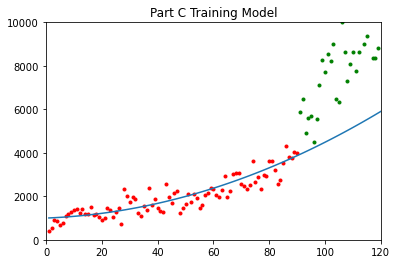

In [46]:
# Graph of c
x_3c = minibatch_gradient_descent(A3,data,10000,10, theta = np.array([[1000],[5],[0]]), t0=2000, t1=50000000000)
ytrain_predict3c = x_3c[-1][0][0] + x_3c[-1][1][0]*xtrain + x_3c[-1][2][0]*xtrain**2
y_predict3c = x_3c[-1][0][0] + x_3c[-1][1][0]*x_other + x_3c[-1][2][0]*x_other**2

print('The mean squared error in part C for y_train is: ', mean_squared_error(ytrain, ytrain_predict3c))
print('The mean squared error in part C for y_valid is: ', mean_squared_error(y_other, y_predict3c))

plt.plot(xtrain, ytrain, "r.")
plt.plot(x_other, y_other, 'g.')
plt.plot(t, x_3c[-1][0][0] + x_3c[-1][1][0]*t + x_3c[-1][2][0]*t**2)
plt.title('Part C Training Model')
plt.axis([0,120,0,10000])
plt.show()

### Question 4 (12 points) ###  
Repeat Problem 2 for the cubic polynomial regression model $(I = A + Bt + Ct^{2} + Dt^{3})$.

In [15]:
# Part a
A4 = np.c_[np.ones((90,1)),xtrain,xtrain**2,xtrain**3]
x_4a = np.linalg.inv(A4.T.dot(A4)).dot(A4.T).dot(hw_data[0:90])
print('Normal equation: y = {} + {}x + {}x^2 + {}x^3'.format(x_4a[0],x_4a[1],x_4a[2],x_4a[3]))

Normal equation: y = 653.0878185623377 + 49.54224791452369x + -0.9423041680133852x^2 + 0.008939320169158873x^3


In [19]:
# Part b
data = np.reshape(ytrain, (len(hw_data[0:90]),1))
x_4b = full_batch_gradient_descent(A4,data,10000, theta = np.array([[653],[50],[-1],[0]]), eta = 1e-13) 
print('Full batch gradient descent: y = {} + {}x + {}x^2 + {}x^3'.format(x_4b[-1][0][0],x_4b[-1][1][0], x_4b[-1][2][0], x_4b[-1][3][0]))

Full batch gradient descent: y = 653.0000012205611 + 50.00004720671147x + -0.9984683816231346x^2 + 0.009585343813697045x^3


In [37]:
# Part c
x_4c = minibatch_gradient_descent(A4,data,10000,10, theta = np.array([[653],[50],[-1],[0]]), t0=2000000000, t1=5e20)
print('Mini-batch (size 10) gradient descent: y = {} + {}x + {}x^2 + {}x^3'.format(x_4c[-1][0][0],x_4c[-1][1][0], x_4c[-1][2][0], x_4c[-1][3][0]))

Mini-batch (size 10) gradient descent: y = 653.0000085740047 + 50.00032979547397x + -0.9896885314287233x^2 + 0.009648263240464671x^3


The mean squared error in part A for the training y values is:  131360.05818335954
The mean squared error in part A for the other y values is:  4326620.564055028


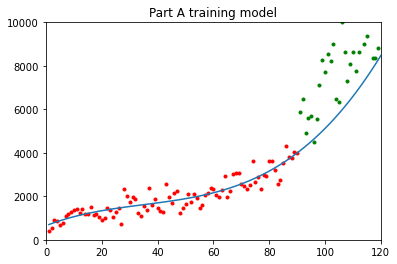

In [27]:
# Part d

# Graph of a
A4 = np.c_[np.ones((90,1)),xtrain,xtrain**2,xtrain**3]
x_4a = np.linalg.inv(A4.T.dot(A4)).dot(A4.T).dot(hw_data[0:90])
ytrain_predict4 = x_4a[0] + x_4a[1]*xtrain + x_4a[2]*xtrain**2 + x_4a[3]*xtrain**3
y_predict4 = x_4a[0] + x_4a[1]*x_other + x_4a[2]*x_other**2 + x_4a[3]*x_other**3

print('The mean squared error in part A for the training y values is: ', mean_squared_error(ytrain, ytrain_predict4))
print('The mean squared error in part A for the other y values is: ', mean_squared_error(y_other, y_predict4))

plt.plot(xtrain, ytrain, "r.")
plt.plot(x_other, y_other, 'g.')
plt.plot(t, x_4a[0] + x_4a[1]*t + x_4a[2]*t**2 + x_4a[3]*t**3)
plt.title('Part A training model')
plt.axis([0,120,0,10000])
plt.show()

The mean squared error in for y_train is:  131997.3430662139
The mean squared error in for y_valid is:  3701257.3856720286


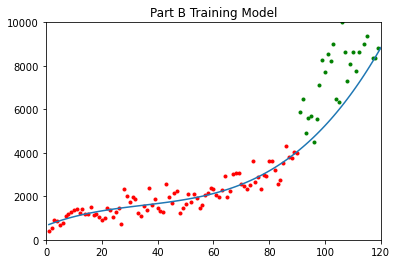

In [41]:
# Graph of b
x_4b = full_batch_gradient_descent(A4,data,10000, theta = np.array([[653],[50],[-1],[0]]), eta = 1e-13) 
ytrain_predict4b = x_4b[-1][0][0] + x_4b[-1][1][0]*xtrain + x_4b[-1][2][0]*xtrain**2 + x_4b[-1][3][0]*xtrain**3
y_predict4b = x_4b[-1][0][0] + x_4b[-1][1][0]*x_other + x_4b[-1][2][0]*x_other**2 + x_4b[-1][3][0]*x_other**3

print('The mean squared error in for y_train is: ', mean_squared_error(ytrain, ytrain_predict4b))
print('The mean squared error in for y_valid is: ', mean_squared_error(y_other, y_predict4b))

plt.plot(xtrain, ytrain, "r.")
plt.plot(x_other, y_other, 'g.')
plt.plot(t, x_4b[-1][0][0] + x_4b[-1][1][0]*t + x_4b[-1][2][0]*t**2 + x_4b[-1][3][0]*t**3)
plt.title('Part B Training Model')
plt.axis([0,120,0,10000])
plt.show()

The mean squared error in part C for y_train is:  153015.27927092163
The mean squared error in part C for y_valid is:  10128970.734694203


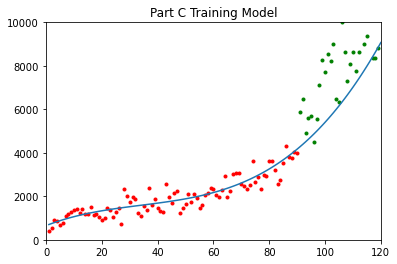

In [42]:
# Graph of c
x_4c = minibatch_gradient_descent(A4,data,10000,10, theta = np.array([[653],[50],[-1],[0]]), t0=2000000000, t1=5e20)
ytrain_predict4c = x_4c[-1][0][0] + x_4c[-1][1][0]*xtrain + x_4c[-1][2][0]*xtrain**2 + x_4c[-1][3][0]*xtrain**3
y_predict4c = x_4c[-1][0][0] + x_4c[-1][1][0]*x_other + x_4c[-1][2][0]*x_other**2 + x_4c[-1][3][0]*x_other**3

print('The mean squared error in part C for y_train is: ', mean_squared_error(ytrain, ytrain_predict3c))
print('The mean squared error in part C for y_valid is: ', mean_squared_error(y_other, y_predict3c))

plt.plot(xtrain, ytrain, "r.")
plt.plot(x_other, y_other, 'g.')
plt.plot(t, x_4c[-1][0][0] + x_4c[-1][1][0]*t + x_4c[-1][2][0]*t**2 + x_4c[-1][3][0]*t**3)
plt.title('Part C Training Model')
plt.axis([0,120,0,10000])
plt.show()

### Question 5 (4 points) ###
Comment on the models in Problems 2/3/4  and select the best model for prediction. 

##### Analysis of Question 2
For this question, the training models of all 3 parts were mostly linear. However, the model in part c best fits with the training data given

##### Analysis of Question 3
For this question, the training models of all 3 parts had a slight curve, but did not fit with the predictions made. However, the model in part c best fits with the training data given

##### Analysis of Question 4
For this question, the training models of all 3 parts best fit the data compared to the models in questions 2 and 3. Despite that, the model in part c best fits with the training data given and the predictions.